## Imports

In [1]:
import pandas
import numpy
import seaborn
import matplotlib
import matplotlib.pyplot as pyplot
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataframe = pandas.read_csv(r"C:\Users\justi\Downloads\Final Project\2. Data\Prepared\air_quality_prepared.csv")

## Data Prep

<AxesSubplot:xlabel='CO Mean', ylabel='NO2 Mean'>

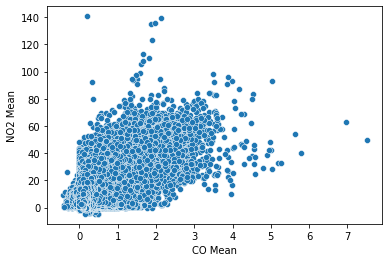

In [3]:
# Create scatterplot of variables to be used in linear regression
seaborn.scatterplot(data = dataframe, x = 'CO Mean', y = 'NO2 Mean')

In [4]:
# Reshape variables into arrays
x = dataframe['CO Mean'].values.reshape(-1,1)
y = dataframe['NO2 Mean'].values.reshape(-1,1)

In [5]:
# Split data into training set and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

## Linear Regression

In [9]:
regression = LinearRegression()

In [10]:
# Fit training set to regression model
regression.fit(xtrain, ytrain)

LinearRegression()

In [11]:
# Create prediction based on training set
predicted = regression.predict(xtest)

Text(0, 0.5, 'NO2 Mean')

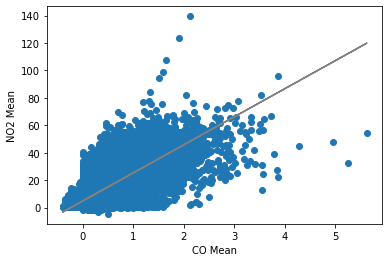

In [14]:
# Visualization of predicted regression line over test set 
pyplot.scatter(xtest, ytest)
pyplot.plot(xtest, predicted, color='gray')
pyplot.xlabel('CO Mean')
pyplot.ylabel('NO2 Mean')

As CO Mean increases, a linear regression line becomes less ideal for modeling the relationship between the two variables. However, I think that the model will turn out to have performed moderately well since so many of the points are clustered in the region where CO Mean is low.

## Results

In [15]:
# Check model performance statistics
mean_squared_error(ytest, predicted)

48.877377012769465

In [16]:
r2_score(ytest, predicted)

0.40495211195926917

In [19]:
# Compare predicted values with actual test set values
pandas.DataFrame({'Actual': ytest.flatten(), 'Predicted': predicted.flatten()}).head(25)

,Actual,Predicted
0,8.739130,16.259505
1,4.333333,9.193176
2,15.913636,9.703996
3,13.958333,14.386514
4,5.462500,7.660718
5,11.500000,20.090650
6,0.541667,8.597214
7,15.554545,10.981044
8,7.937500,8.937767
9,31.173913,17.281144


## Conclusions

After viewing model performance statistics, as well as the actual values of the test set in comparison with the predicted values, it is apparent that a linear regression model does not perform well at predicting the relationship between the two variables.

I think that the most likely form of bias for this dataset is measurement bias. The instruments used to measure concentrations of atmospheric components are likely very sensitive and may be prone to error.